In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations, pack pairs by zipping them into a tuple.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

619

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | east london
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | bolshoy tsaryn
City not found. Skipping...
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | hithadhoo
Processing Record 7 of Set 1 | cabo san lucas
Processing Record 8 of Set 1 | airai
Processing Record 9 of Set 1 | santiago del estero
Processing Record 10 of Set 1 | srednekolymsk
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 13 of Set 1 | saint george
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | vanimo
Processing Record 16 of Set 1 | inta
Processing Record 17 of Set 1 | souillac
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | luderitz
Processing Record 20 of Set 1 | arlit
Processing Record 21 of Set 1 | castro
Process

Processing Record 36 of Set 4 | naifaru
Processing Record 37 of Set 4 | paamiut
Processing Record 38 of Set 4 | ponta delgada
Processing Record 39 of Set 4 | idrinskoye
Processing Record 40 of Set 4 | humberto de campos
Processing Record 41 of Set 4 | tasiilaq
Processing Record 42 of Set 4 | japura
Processing Record 43 of Set 4 | san cristobal
Processing Record 44 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 45 of Set 4 | riyadh
Processing Record 46 of Set 4 | wattegama
Processing Record 47 of Set 4 | urumqi
Processing Record 48 of Set 4 | saint-pierre
Processing Record 49 of Set 4 | laguna de perlas
Processing Record 50 of Set 4 | samana
Processing Record 1 of Set 5 | esperance
Processing Record 2 of Set 5 | poya
Processing Record 3 of Set 5 | pedasi
Processing Record 4 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 5 of Set 5 | ponta do sol
Processing Record 6 of Set 5 | port elizabeth
Processing Record 7 of Set 5 | malajog
Processing 

Processing Record 24 of Set 8 | orvieto
Processing Record 25 of Set 8 | grindavik
Processing Record 26 of Set 8 | kenai
Processing Record 27 of Set 8 | rexburg
Processing Record 28 of Set 8 | bartlesville
Processing Record 29 of Set 8 | chilca
Processing Record 30 of Set 8 | amderma
City not found. Skipping...
Processing Record 31 of Set 8 | sao sebastiao
Processing Record 32 of Set 8 | atar
Processing Record 33 of Set 8 | bharatpur
Processing Record 34 of Set 8 | kollumerland
City not found. Skipping...
Processing Record 35 of Set 8 | durango
Processing Record 36 of Set 8 | hobyo
Processing Record 37 of Set 8 | yibin
Processing Record 38 of Set 8 | nome
Processing Record 39 of Set 8 | sabang
Processing Record 40 of Set 8 | waingapu
Processing Record 41 of Set 8 | dinar
Processing Record 42 of Set 8 | vichayal
City not found. Skipping...
Processing Record 43 of Set 8 | mount isa
Processing Record 44 of Set 8 | formosa
Processing Record 45 of Set 8 | ligayan
Processing Record 46 of Set 

Processing Record 14 of Set 12 | hami
Processing Record 15 of Set 12 | snyder
Processing Record 16 of Set 12 | bedesa
Processing Record 17 of Set 12 | kapchorwa
Processing Record 18 of Set 12 | zhigansk
Processing Record 19 of Set 12 | xuddur
Processing Record 20 of Set 12 | xianshuigu
Processing Record 21 of Set 12 | komsomolskiy
Processing Record 22 of Set 12 | bud
Processing Record 23 of Set 12 | havre-saint-pierre
Processing Record 24 of Set 12 | szczytno
Processing Record 25 of Set 12 | tapes
Processing Record 26 of Set 12 | amparafaravola
Processing Record 27 of Set 12 | vila
Processing Record 28 of Set 12 | hede
Processing Record 29 of Set 12 | yerbogachen
Processing Record 30 of Set 12 | half moon bay
Processing Record 31 of Set 12 | kiruna
Processing Record 32 of Set 12 | fougamou
Processing Record 33 of Set 12 | sungairaya
Processing Record 34 of Set 12 | katherine
Processing Record 35 of Set 12 | mildura
Processing Record 36 of Set 12 | fevralsk
City not found. Skipping...
P

In [10]:
# Tally the number of cities
len(city_data)

574

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.5322,20.0403,59.23,82,0,1.83,ZA,2022-11-13 20:12:03
1,East London,-33.0153,27.9116,64.00,76,5,12.28,ZA,2022-11-13 20:12:04
2,Ushuaia,-54.8000,-68.3000,56.86,47,20,13.80,AR,2022-11-13 20:12:04
3,Bluff,-46.6000,168.3333,49.64,78,25,6.64,NZ,2022-11-13 20:12:04
4,Hithadhoo,-0.6000,73.0833,81.25,77,100,13.42,MV,2022-11-13 20:12:05
5,Cabo San Lucas,22.8909,-109.9124,82.62,65,40,11.50,MX,2022-11-13 20:08:39
6,Airai,-8.9266,125.4092,61.47,90,100,1.48,TL,2022-11-13 20:10:56
7,Santiago Del Estero,-27.7951,-64.2615,80.47,38,16,14.81,AR,2022-11-13 20:12:05
8,Srednekolymsk,67.4500,153.6833,-18.26,94,99,2.33,RU,2022-11-13 20:12:06
9,Albany,42.6001,-73.9662,45.95,66,77,1.01,US,2022-11-13 20:10:52


In [13]:
# Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bredasdorp,ZA,2022-11-13 20:12:03,-34.5322,20.0403,59.23,82,0,1.83
1,East London,ZA,2022-11-13 20:12:04,-33.0153,27.9116,64.00,76,5,12.28
2,Ushuaia,AR,2022-11-13 20:12:04,-54.8000,-68.3000,56.86,47,20,13.80
3,Bluff,NZ,2022-11-13 20:12:04,-46.6000,168.3333,49.64,78,25,6.64
4,Hithadhoo,MV,2022-11-13 20:12:05,-0.6000,73.0833,81.25,77,100,13.42
5,Cabo San Lucas,MX,2022-11-13 20:08:39,22.8909,-109.9124,82.62,65,40,11.50
6,Airai,TL,2022-11-13 20:10:56,-8.9266,125.4092,61.47,90,100,1.48
7,Santiago Del Estero,AR,2022-11-13 20:12:05,-27.7951,-64.2615,80.47,38,16,14.81
8,Srednekolymsk,RU,2022-11-13 20:12:06,67.4500,153.6833,-18.26,94,99,2.33
9,Albany,US,2022-11-13 20:10:52,42.6001,-73.9662,45.95,66,77,1.01


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1668373610.494668

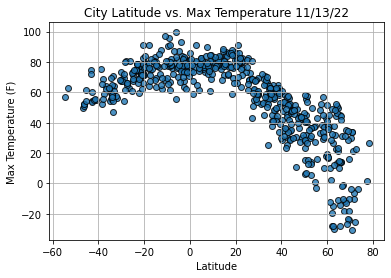

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

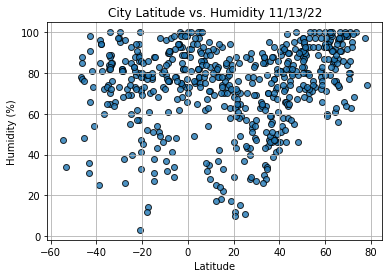

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

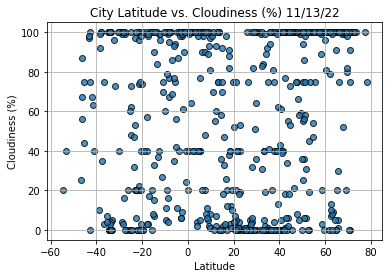

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

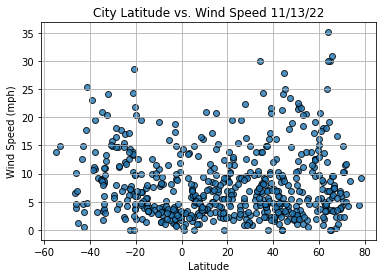

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [23]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [25]:
# Create a new DataFrame with loc at index 13 of the city_data_df
index13 = city_data_df.loc[13] 
index13

City                         Inta
Country                        RU
Date          2022-11-13 20:12:07
Lat                       66.0317
Lng                       60.1659
Max Temp                     14.2
Humidity                       96
Cloudiness                    100
Wind Speed                   3.56
Name: 13, dtype: object

In [26]:
# Filter DataFrame based on all Northern Hemisphere latitudes.
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3      False
4      False
       ...  
569     True
570     True
571     True
572    False
573     True
Name: Lat, Length: 574, dtype: bool

In [27]:
# Create a DataFrame with .loc for all Northern Hemisphere latitudes and display first 5 rows with .head().
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
5,Cabo San Lucas,MX,2022-11-13 20:08:39,22.8909,-109.9124,82.62,65,40,11.50
8,Srednekolymsk,RU,2022-11-13 20:12:06,67.4500,153.6833,-18.26,94,99,2.33
9,Albany,US,2022-11-13 20:10:52,42.6001,-73.9662,45.95,66,77,1.01
10,Saint George,US,2022-11-13 20:07:17,37.1041,-113.5841,48.43,48,100,4.00
11,Jamestown,US,2022-11-13 20:12:06,42.0970,-79.2353,35.71,78,100,10.36


In [28]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

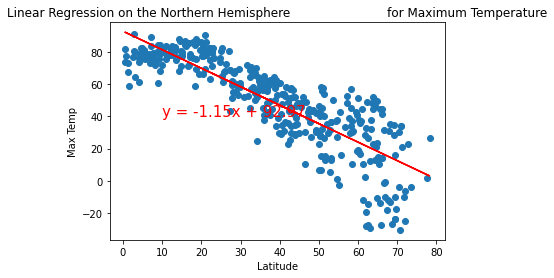

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

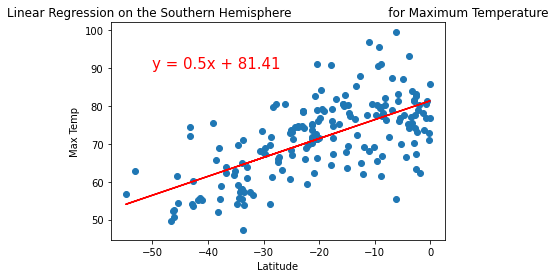

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

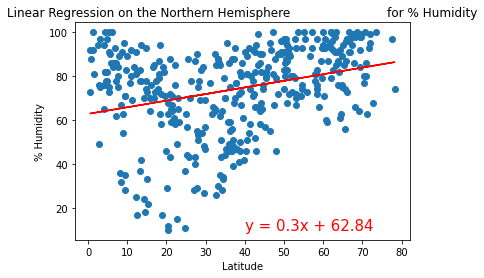

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

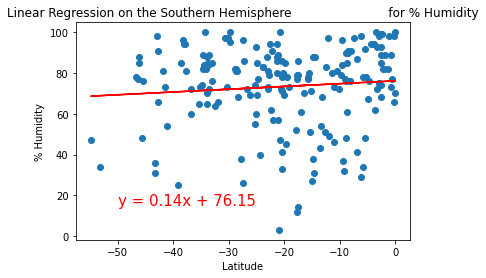

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

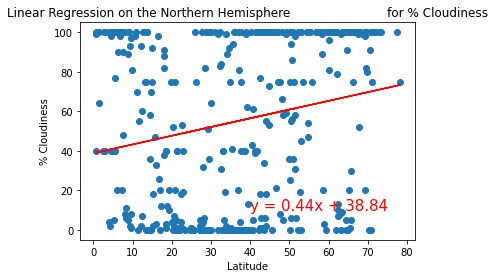

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

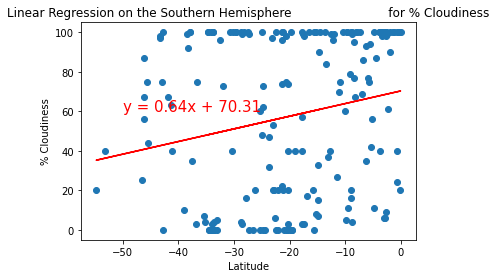

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

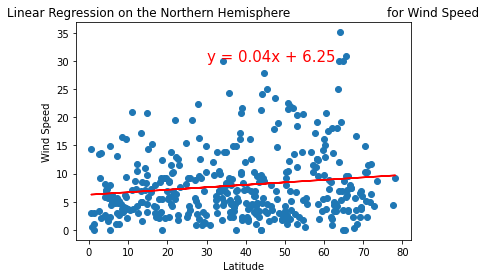

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(30,30))

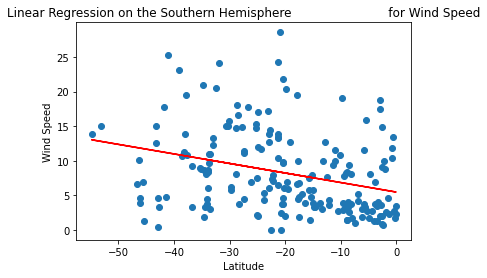

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))